In [7]:
import random
import numpy as np
from scipy.spatial import distance
import pandas as pd


def give_me_vector(dim):
    return np.random.randint(100, size=dim)/100

def give_me_10points(dim):
    dataset = []
    for i in range(10):
        dataset.append(give_me_vector(dim))
    return dataset

def cal_average_pair_distance(dataset):
    distances = []
    for item1 in dataset:
        for item2 in dataset:
            distances.append(distance.euclidean(item1, item2))
    return distances        

def Average(lst): 
    return sum(lst) / len(lst) 

In [17]:
results = []
for dim1 in range(1,1000):
    data1 = give_me_10points(dim1)
    data1_distancearr = cal_average_pair_distance(data1)
    data1_distancearr_avg = Average(data1_distancearr)
    base0 = [0]*dim1
    base1 = [1]*dim1
    maxd = distance.euclidean(base0,base1)
    v_min = min([x for x in data1_distancearr if x>0])
    v_max = max([x for x in data1_distancearr if x>0])
    
    results.append( (dim1, data1_distancearr_avg,maxd,v_min,v_max))
    
results_df = pd.DataFrame(results,columns=["dim","average_distance","maxd","vmin","vmax"])    

In [22]:
results_df[:10]

,dim,average_distance,maxd,vmin,vmax,ratio,min_max_ratio
0,1,0.258600,1.000000,0.010000,0.640000,0.258600,5.727273
1,2,0.447469,1.414214,0.040000,0.985951,0.316409,6.756795
2,3,0.675897,1.732051,0.181659,1.216635,0.390229,3.674570
3,4,0.716768,2.000000,0.205426,1.288681,0.358384,3.546698
4,5,0.780197,2.236068,0.134907,1.427550,0.348915,5.502777
5,6,0.951072,2.449490,0.428719,1.582277,0.388273,2.181797
6,7,0.995878,2.645751,0.638984,1.571846,0.376406,1.262359
7,8,0.983373,2.828427,0.524595,1.655415,0.347675,1.810485
8,9,1.091744,3.000000,0.673647,1.871710,0.363915,1.548593
9,10,1.079852,3.162278,0.603407,1.915385,0.341479,1.865176


Text(0, 0.5, 'L2 distance')

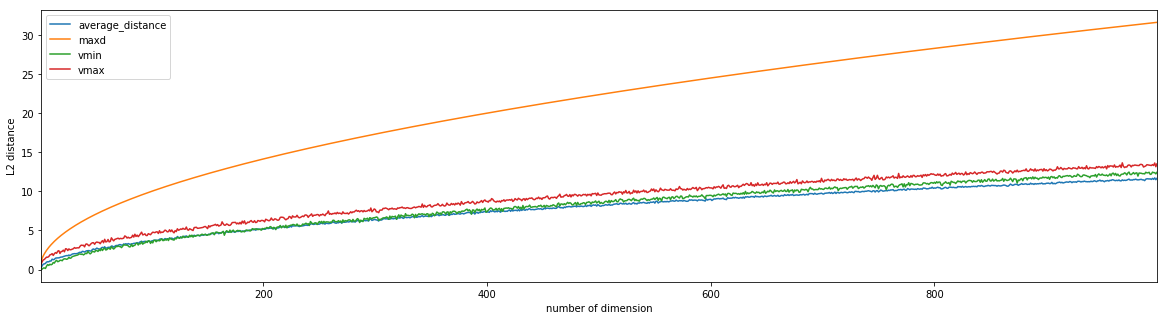

In [19]:
%matplotlib inline
ax1 = results_df.set_index("dim").plot(figsize=(20,5))
ax1.set_xlabel("number of dimension")
ax1.set_ylabel("L2 distance")

Text(0, 0.5, 'Distance in ratio(L2 distance/Max)')

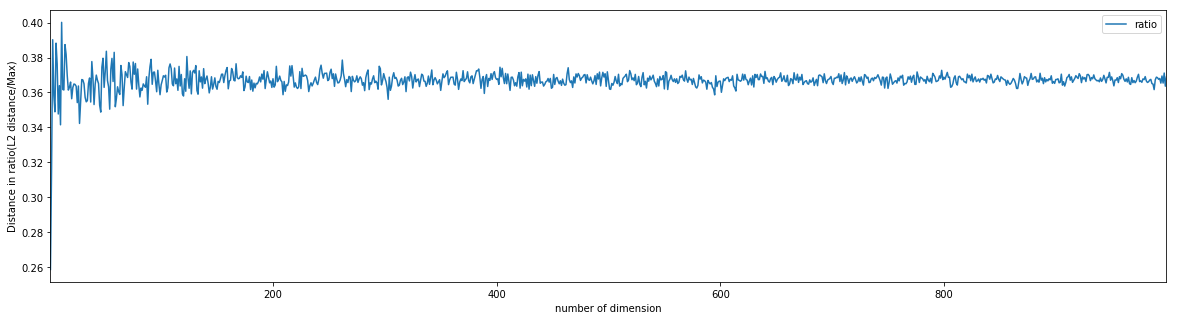

In [20]:
results_df["ratio"] = results_df.apply(lambda x:x["average_distance"]/x["maxd"],axis=1)
ax1 = results_df.set_index("dim").loc[:,["ratio"]].plot(figsize=(20,5))
ax1.set_xlabel("number of dimension")
ax1.set_ylabel("Distance in ratio(L2 distance/Max)")

Text(0, 0.5, 'min_max_ratio')

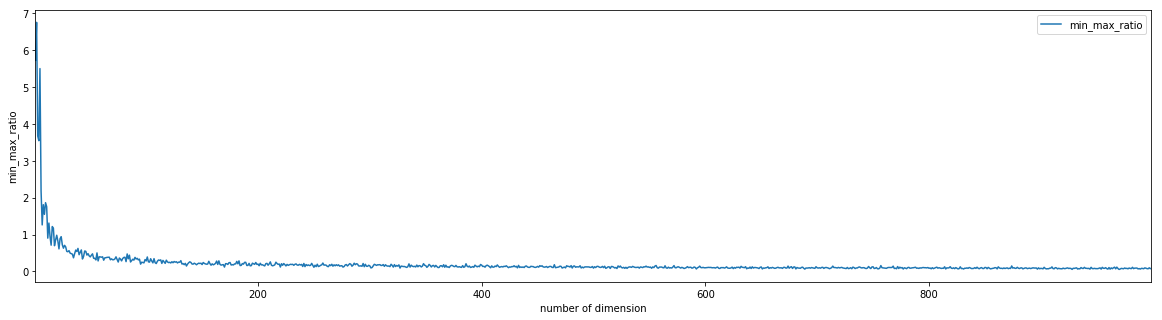

In [21]:
results_df["min_max_ratio"] = results_df.apply(lambda x:(x["vmax"]-x["vmin"])/(x["vmin"]+0.1),axis=1)
ax1 = results_df.set_index("dim").loc[:,["min_max_ratio"]].plot(figsize=(20,5))
ax1.set_xlabel("number of dimension")
ax1.set_ylabel("min_max_ratio")